In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('./New_Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./New_Data/ICMRTestingDetails.csv
./New_Data/StatewiseTestingDetails.csv
./New_Data/population_india_census2011.csv
./New_Data/complete.csv
./New_Data/individualdetails.csv
./New_Data/AgeGroupDetails.csv
./New_Data/ICMRTestingLabs.csv
./New_Data/HospitalBedsIndia.csv
./New_Data/patients_data.csv
./New_Data/IndividualDetails.csv
./New_Data/HospitalBedsIndiaLocations.csv
./New_Data/covid_19_india.csv


In [5]:
!pip install geopy

In [6]:
import re
from time import strptime
from datetime import datetime
import nltk
import matplotlib.pyplot as plt
# Network Science for web project
import networkx as nx

import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 
import os
import folium
from folium.plugins import FloatImage
from folium.features import DivIcon
import geopy
from  geopy.geocoders import Nominatim
import itertools
from IPython.display import clear_output
import time
import plotly.express as px
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [7]:
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.sem.relextract import extract_rels, rtuple
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import Tree

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/rohith/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/rohith/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/rohith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rohith/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
def getRelBetnPersonLoc(x):
    chunked = ne_chunk(pos_tag(word_tokenize(x)))
    pat = re.compile('.*\S.*')
    rels = extract_rels('PER', 'GPE', chunked, corpus = 'ace', pattern = pat)
    for rel in rels:
        return(rtuple(rel))

In [9]:
def get_locations(text):
    # Tokenize work, POS tag, and NER
    tokenizeText  = word_tokenize(text)
    posTagText = nltk.pos_tag(tokenizeText)
    namedEnt1= nltk.ne_chunk(posTagText)
    #namedEnt1.draw()
    namedEnt2 = []
    for i in namedEnt1:
        if hasattr(i, 'label'):
            NE_Name = ' '.join(x[0] for x in i.leaves())
            NE_Type = i.label()
            namedEnt2.append([NE_Name, NE_Type]) 
    #display(namedEnt2)
    tmp = list(filter(lambda x:x[1]=='GPE',namedEnt2))
    countries = []
    for i in range(len(tmp)):
        countries.append(tmp[i][0])
    return countries 


In [10]:
def fun1(x):
    return datetime.strptime(x, '%d-%b-%y').date().strftime("%d-%b-%Y")

def fun2(x):
    return datetime.strptime(x, '%m/%d/%Y').date().strftime("%d-%m-%Y") 

def fun3(x):
    tmp = ''.join(map(str, x))
    return tmp

def fun4(x):
    tmp = re.findall(r'CP\d+',x)
    return (", ".join(tmp))

In [11]:
input_data_chunk = pd.read_csv("./New_Data/individualdetails.csv", chunksize=100, iterator=True, skipinitialspace=True, index_col=False)  
input_data = pd.concat(input_data_chunk, ignore_index=True)
input_data = input_data[['Unique id', 'Diagnosed date', 'Age', 'Gender', 'Detected state', 'Detected district', 'Nationality', 'Current status', 'Status change date', 'Notes', 'Contacts' ]]
display("Input data shape", input_data.shape)
display("Input data head", input_data.head())

'Input data shape'

(544, 11)

'Input data head'

,Unique id,Diagnosed date,Age,Gender,Detected state,Detected district,Nationality,Current status,Status change date,Notes,Contacts
0,1,30-Jan-20,20.0,Female,Kerala,Thrissur,India,Recovered,2/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN
1,2,2-Feb-20,NaN,Unknown,Kerala,Alappuzha,India,Recovered,2/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN
2,3,3-Feb-20,NaN,Unknown,Kerala,Kasaragod,India,Recovered,2/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN
3,4,2-Mar-20,45.0,Male,Delhi,East Delhi,India,Recovered,3/15/2020,"Travelled from Austria, Italy.\nTravel history...","Patient 22:, Patient 23:, Patient 24:, Patient..."
4,5,2-Mar-20,NaN,Unknown,Telangana,Hyderabad,India,Recovered,3/2/2020,"Travelled from Dubai, Singapore contact.\nTrav...",NaN


In [12]:
input_data[['Unique id', 'Diagnosed date', 'Gender', 'Detected state', 'Detected district', 'Nationality', 'Current status', 'Status change date', 'Notes', 'Contacts']] = input_data[['Unique id', 'Diagnosed date', 'Gender', 'Detected state', 'Detected district', 'Nationality', 'Current status', 'Status change date', 'Notes',  'Contacts']].astype(str)
input_data[['Age']] = input_data[['Age']].apply(pd.to_numeric)
input_data = input_data.dropna(how='any')
input_data = input_data.drop(input_data[input_data.Contacts == 'nan'].index)

In [13]:
# input_data.head()
input_data['Diagnosed date'] = input_data['Diagnosed date'].apply(fun1)
input_data['Diagnosed date'] =  pd.to_datetime(input_data['Diagnosed date'], format="%d-%b-%Y")
display("Input data head", input_data.head())

'Input data head'

,Unique id,Diagnosed date,Age,Gender,Detected state,Detected district,Nationality,Current status,Status change date,Notes,Contacts
3,4,2020-03-02,45.0,Male,Delhi,East Delhi,India,Recovered,3/15/2020,"Travelled from Austria, Italy.\nTravel history...","Patient 22:, Patient 23:, Patient 24:, Patient..."
5,6,2020-03-03,69.0,Male,Rajasthan,Jaipur,Italy,Recovered,3/3/2020,Travelled from Italy.\nItalian tourist,"Patient 7:, Patient 8:, Patient 9:, Patient 10..."
6,7,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,3/4/2020,Travelled from Italy.\nItalian tourist,Patient 6:
7,8,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,3/4/2020,Travelled from Italy.\nItalian tourist,Patient 6:
8,9,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,3/4/2020,Travelled from Italy.\nItalian tourist,Patient 6:


In [14]:
input_data['Status change date'] = input_data['Status change date'].apply(fun2)
input_data['Status change date'] =  pd.to_datetime(input_data['Status change date'], format="%d-%m-%Y")

In [15]:
input_data['DiagDate-StatusChDate'] = input_data['Status change date'] - input_data['Diagnosed date']
input_data['Contacts'] = input_data['Contacts'].str.replace('Patient ', 'CP') 

In [16]:
# Create separate columns for contacted patients using the Contacts column
input_data_expanded = input_data.join(input_data['Contacts'].str.split(',', expand=True).add_prefix('Contacts').fillna(np.nan))
input_data_expanded = input_data_expanded.drop('Contacts', 1)

In [17]:
input_data_expanded.rename(columns={'Unique id': 'PatientID'}, inplace=True)
input_data_expanded['PatientID'] = 'P' + input_data_expanded['PatientID'].astype(str)

In [18]:
input_data_expanded['travelledFrom'] = input_data_expanded['Notes'].apply(get_locations)

In [19]:
input_data_expanded.head()

,PatientID,Diagnosed date,Age,Gender,Detected state,Detected district,Nationality,Current status,Status change date,Notes,DiagDate-StatusChDate,Contacts0,Contacts1,Contacts2,Contacts3,Contacts4,Contacts5,Contacts6,Contacts7,Contacts8,Contacts9,Contacts10,Contacts11,Contacts12,Contacts13,Contacts14,Contacts15,travelledFrom
3,P4,2020-03-02,45.0,Male,Delhi,East Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",13 days,CP22:,CP23:,CP24:,CP25:,CP26:,CP27:,CP47:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Austria, Italy, Italy]"
5,P6,2020-03-03,69.0,Male,Rajasthan,Jaipur,Italy,Recovered,2020-03-03,Travelled from Italy.\nItalian tourist,0 days,CP7:,CP8:,CP9:,CP10:,CP11:,CP12:,CP13:,CP14:,CP15:,CP16:,CP17:,CP18:,CP19:,CP20:,CP21:,CP28:,"[Italy, Italian]"
6,P7,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,2020-03-04,Travelled from Italy.\nItalian tourist,0 days,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Italy, Italian]"
7,P8,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,2020-03-04,Travelled from Italy.\nItalian tourist,0 days,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Italy, Italian]"
8,P9,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,2020-03-04,Travelled from Italy.\nItalian tourist,0 days,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Italy, Italian]"


In [20]:
input_data_expanded['travelledFrom'] = input_data_expanded['travelledFrom'].apply(fun3)
input_data_expanded = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts0', 'Contacts1', 'Contacts2', 'Contacts3', 'Contacts4', 'Contacts5', 'Contacts6', 'Contacts7', 'Contacts8', 'Contacts9', 'Contacts10', 'Contacts11', 'Contacts12', 'Contacts13', 'Contacts14', 'Contacts15']]

In [21]:
input_data_expanded.head()

,travelledFrom,PatientID,Contacts0,Contacts1,Contacts2,Contacts3,Contacts4,Contacts5,Contacts6,Contacts7,Contacts8,Contacts9,Contacts10,Contacts11,Contacts12,Contacts13,Contacts14,Contacts15
3,AustriaItalyItaly,P4,CP22:,CP23:,CP24:,CP25:,CP26:,CP27:,CP47:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ItalyItalian,P6,CP7:,CP8:,CP9:,CP10:,CP11:,CP12:,CP13:,CP14:,CP15:,CP16:,CP17:,CP18:,CP19:,CP20:,CP21:,CP28:
6,ItalyItalian,P7,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ItalyItalian,P8,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ItalyItalian,P9,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Create edgelist for network
tmp = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts0']]

tmp1 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts1']]
tmp1.columns = tmp.columns
tmp1 = pd.concat([tmp, tmp1],  axis=0, ignore_index=True)

tmp2 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts2']]
tmp2.columns = tmp.columns
tmp2 = pd.concat([tmp1, tmp2],  axis=0, ignore_index=True)

tmp3 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts3']]
tmp3.columns = tmp.columns
tmp3 = pd.concat([tmp2, tmp3],  axis=0, ignore_index=True)

tmp4 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts4']]
tmp4.columns = tmp.columns
tmp4 = pd.concat([tmp3, tmp4],  axis=0, ignore_index=True)

tmp5 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts5']]
tmp5.columns = tmp.columns
tmp5 = pd.concat([tmp4, tmp5],  axis=0, ignore_index=True)

tmp6 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts6']]
tmp6.columns = tmp.columns
tmp6 = pd.concat([tmp5, tmp6],  axis=0, ignore_index=True)

tmp7 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts7']]
tmp7.columns = tmp.columns
tmp7 = pd.concat([tmp6, tmp7],  axis=0, ignore_index=True)

tmp8 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts8']]
tmp8.columns = tmp.columns
tmp8 = pd.concat([tmp7, tmp8],  axis=0, ignore_index=True)

tmp9 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts9']]
tmp9.columns = tmp.columns
tmp9 = pd.concat([tmp8, tmp9],  axis=0, ignore_index=True)

tmp10 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts10']]
tmp10.columns = tmp.columns
tmp10 = pd.concat([tmp9, tmp10],  axis=0, ignore_index=True)

tmp11 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts11']]
tmp11.columns = tmp.columns
tmp11 = pd.concat([tmp10, tmp11],  axis=0, ignore_index=True)

tmp12 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts12']]
tmp12.columns = tmp.columns
tmp12 = pd.concat([tmp11, tmp12],  axis=0, ignore_index=True)

tmp13 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts13']]
tmp13.columns = tmp.columns
tmp13 = pd.concat([tmp12, tmp13],  axis=0, ignore_index=True)

tmp14 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts14']]
tmp14.columns = tmp.columns
tmp14 = pd.concat([tmp13, tmp14],  axis=0, ignore_index=True)

tmp15 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts15']]
tmp15.columns = tmp.columns
tmp15 = pd.concat([tmp14, tmp15],  axis=0, ignore_index=True)

In [23]:
edgelist = tmp15[pd.notnull(tmp15['Contacts0'])]
edgelist = edgelist.replace(r'^\s*$', 'NA', regex=True)

In [24]:
edgelist

,travelledFrom,PatientID,Contacts0
0,AustriaItalyItaly,P4,CP22:
1,ItalyItalian,P6,CP7:
2,ItalyItalian,P7,CP6:
3,ItalyItalian,P8,CP6:
4,ItalyItalian,P9,CP6:
5,ItalyItalian,P10,CP6:
6,ItalyItalian,P11,CP6:
7,ItalyItalian,P12,CP6:
8,ItalyItalian,P13,CP6:
9,ItalyItalian,P14,CP6:


In [25]:
edgelist = edgelist.groupby(['PatientID','Contacts0', 'travelledFrom']).size().reset_index(name='weight')

In [26]:
edgelist['Contacts0'] = edgelist['Contacts0'].apply(fun4)

In [27]:
display("Processed data with edgelist of Patients and their Contact Patients", edgelist.head())

'Processed data with edgelist of Patients and their Contact Patients'

,PatientID,Contacts0,travelledFrom,weight
0,P10,CP6,ItalyItalian,1
1,P11,CP6,ItalyItalian,1
2,P116,CP74,NA,1
3,P12,CP6,ItalyItalian,1
4,P122,CP95,SpouseP95,1


In [28]:
# Plot network of patients and their contacts
plt.figure(figsize=(15,15)) 
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist, 'PatientID', 'Contacts0', edge_attr = True)

<Figure size 1080x1080 with 0 Axes>

In [29]:
list(G.edges) 

[('P10', 'CP6'),
 ('CP6', 'P11'),
 ('CP6', 'P12'),
 ('CP6', 'P13'),
 ('CP6', 'P14'),
 ('CP6', 'P15'),
 ('CP6', 'P16'),
 ('CP6', 'P17'),
 ('CP6', 'P18'),
 ('CP6', 'P19'),
 ('CP6', 'P20'),
 ('CP6', 'P21'),
 ('CP6', 'P7'),
 ('CP6', 'P8'),
 ('CP6', 'P9'),
 ('P116', 'CP74'),
 ('CP74', 'P137'),
 ('P122', 'CP95'),
 ('CP95', 'P123'),
 ('P137', 'CP296'),
 ('P138', 'CP155'),
 ('P141', 'CP436'),
 ('P148', 'CP81'),
 ('P150', 'CP530'),
 ('P153', 'CP170'),
 ('P155', 'CP138'),
 ('P157', 'CP207'),
 ('P160', 'CP162'),
 ('P160', 'CP161'),
 ('P161', 'CP160'),
 ('CP160', 'P162'),
 ('P172', 'CP225'),
 ('P172', 'CP226'),
 ('P172', 'CP268'),
 ('P172', 'CP287'),
 ('P172', 'CP335'),
 ('P172', 'CP224'),
 ('CP225', 'P437'),
 ('P182', 'CP305'),
 ('P182', 'CP306'),
 ('P182', 'CP307'),
 ('P182', 'CP308'),
 ('P182', 'CP309'),
 ('P182', 'CP311'),
 ('P182', 'CP358'),
 ('P182', 'CP359'),
 ('P182', 'CP360'),
 ('P182', 'CP361'),
 ('P182', 'CP388'),
 ('P182', 'CP488'),
 ('P182', 'CP535'),
 ('P182', 'CP536'),
 ('P182', 'CP

In [30]:
list(G.nodes)

['P10',
 'CP6',
 'P11',
 'P116',
 'CP74',
 'P12',
 'P122',
 'CP95',
 'P123',
 'P13',
 'P137',
 'CP296',
 'P138',
 'CP155',
 'P14',
 'P141',
 'CP436',
 'P148',
 'CP81',
 'P15',
 'P150',
 'CP530',
 'P153',
 'CP170',
 'P155',
 'CP138',
 'P157',
 'CP207',
 'P16',
 'P160',
 'CP162',
 'CP161',
 'P161',
 'CP160',
 'P162',
 'P17',
 'P172',
 'CP225',
 'CP226',
 'CP268',
 'CP287',
 'CP335',
 'CP224',
 'P18',
 'P182',
 'CP305',
 'CP306',
 'CP307',
 'CP308',
 'CP309',
 'CP311',
 'CP358',
 'CP359',
 'CP360',
 'CP361',
 'CP388',
 'CP488',
 'CP535',
 'CP536',
 'CP537',
 'CP304',
 'P19',
 'P196',
 'CP397',
 'P20',
 'P200',
 'CP392',
 'CP393',
 'CP391',
 'P201',
 'CP267',
 'P207',
 'CP157',
 'P21',
 'P213',
 'CP142',
 'P214',
 'P215',
 'P244',
 'CP117',
 'P248',
 'CP250',
 'CP249',
 'P249',
 'CP248',
 'P250',
 'P267',
 'CP201',
 'P268',
 'CP172',
 'P272',
 'CP344',
 'CP345',
 'CP346',
 'CP343',
 'P285',
 'CP516',
 'CP382',
 'P287',
 'P29',
 'CP40',
 'P296',
 'CP137',
 'P297',
 'CP473',
 'P299',
 'CP191

In [31]:
list(G.adj['P6'])

['CP10',
 'CP11',
 'CP12',
 'CP13',
 'CP14',
 'CP15',
 'CP16',
 'CP17',
 'CP18',
 'CP19',
 'CP20',
 'CP21',
 'CP28',
 'CP8',
 'CP9',
 'CP7']

In [32]:
G.degree['P6']

16

In [33]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

In [34]:
tmp = [(n, d) for n, d in G.degree()]
display("Top 10 patients and their degrees", sorted(tmp, key=lambda element: (element[1], element[0]), reverse=True)[:11])

'Top 10 patients and their degrees'

[('P6', 16),
 ('P182', 16),
 ('CP6', 15),
 ('CP182', 8),
 ('P4', 7),
 ('P37', 7),
 ('P36', 7),
 ('P35', 6),
 ('P172', 6),
 ('P38', 5),
 ('P272', 4)]

In [35]:
PatientIDs = list(edgelist.PatientID.unique())
contacts = list(edgelist.Contacts0.unique())

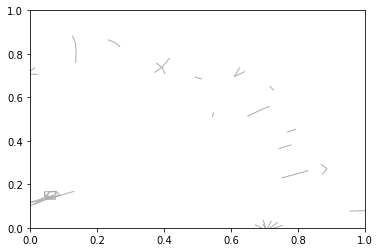

In [36]:
layout = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos=layout, edge_color='#ABABAB')

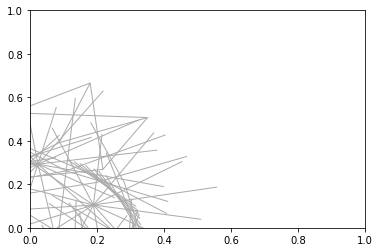

In [37]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx_edges(G, pos=layout, edge_color='#ABABAB')

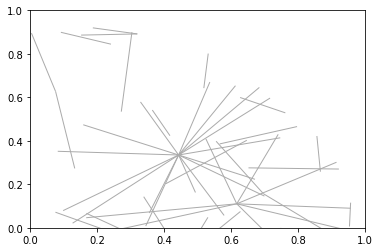

In [38]:
layout = nx.fruchterman_reingold_layout(G,
                                        k=.5,
                                        pos=None,
                                        fixed=None,
                                        iterations=100,
                                        #threshold=1e-4,
                                        weight='weight',
                                        scale=1,
                                        center=None,
                                        dim=2,
                                        seed=None)
nx.draw_networkx_edges(G, pos=layout, edge_color='#ABABAB')

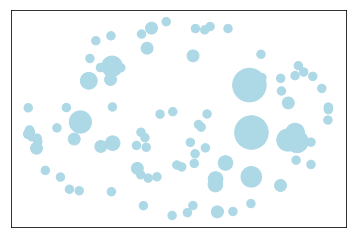

In [39]:
PatientIDs = [node for node in G.nodes() if node in edgelist.PatientID.unique()]
size = [G.degree(node) * 70 for node in G.nodes() if node in edgelist.PatientID.unique()]
nx.draw_networkx_nodes(G, pos=layout, nodelist=PatientIDs, node_size=size, node_color='lightblue')

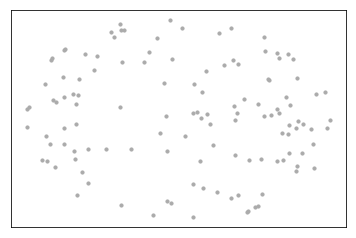

In [40]:
contacts = [node for node in G.nodes() if node in edgelist.Contacts0.unique()]
nx.draw_networkx_nodes(G, pos=layout, nodelist=contacts, node_size=10, node_color='#ABABAB')

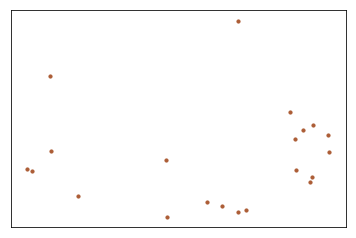

In [41]:
high_degree_Patient0 = [node for node in G.nodes() if node in edgelist.Contacts0.unique() and G.degree(node) > 1]
nx.draw_networkx_nodes(G, pos=layout, nodelist=high_degree_Patient0, node_size=10, node_color='#ac5d36')

{'CP6': Text(-0.0947263,-0.295456,'CP6'),
 'CP74': Text(-0.602393,-0.605741,'CP74'),
 'CP95': Text(0.320249,0.891621,'CP95'),
 'CP296': Text(-0.814079,-0.443678,'CP296'),
 'CP155': Text(-0.43317,0.806704,'CP155'),
 'CP436': Text(0.532089,0.80125,'CP436'),
 'CP81': Text(0.241542,0.844485,'CP81'),
 'CP530': Text(-0.875632,0.350025,'CP530'),
 'CP170': Text(-0.672417,-0.71516,'CP170'),
 'CP138': Text(0.953986,0.00590637,'CP138'),
 'CP207': Text(0.627335,0.599257,'CP207'),
 'CP162': Text(-0.136979,-0.124431,'CP162'),
 'CP161': Text(-0.388373,-0.812333,'CP161'),
 'CP160': Text(-0.755443,-0.223598,'CP160'),
 'CP225': Text(-0.762462,0.420326,'CP225'),
 'CP226': Text(-0.754369,0.677875,'CP226'),
 'CP268': Text(-0.393064,0.134646,'CP268'),
 'CP287': Text(-0.44951,0.854985,'CP287'),
 'CP335': Text(-0.209766,0.659204,'CP335'),
 'CP224': Text(-0.110337,0.366102,'CP224'),
 'CP305': Text(0.531206,0.0480655,'CP305'),
 'CP306': Text(0.737992,-0.0719834,'CP306'),
 'CP307': Text(0.203997,-0.234528,'CP307

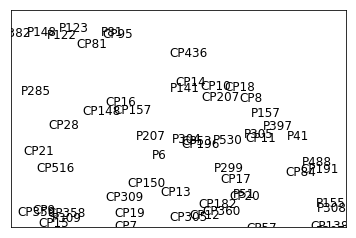

In [42]:
PatientIDs_dict = dict(zip(PatientIDs, PatientIDs))
nx.draw_networkx_labels(G, pos=layout, labels=PatientIDs_dict)
contactsIDs_dict = dict(zip(contacts, contacts))
nx.draw_networkx_labels(G, pos=layout, labels=contactsIDs_dict)

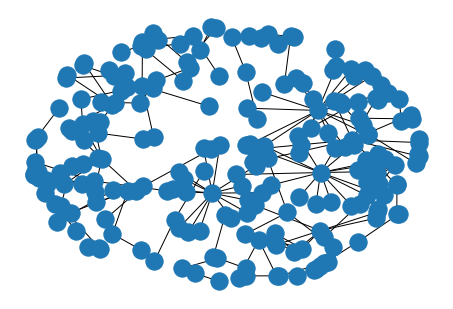

In [43]:
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos=layout, edges=edges, width=weights)

{('P10', 'CP6'): Text(-0.155206,-0.444454,'ItalyItalian'),
 ('CP6', 'P11'): Text(-0.178784,-0.215806,'ItalyItalian'),
 ('CP6', 'P12'): Text(-0.116635,-0.125305,'ItalyItalian'),
 ('CP6', 'P13'): Text(-0.0752114,-0.113016,'ItalyItalian'),
 ('CP6', 'P14'): Text(-0.179447,-0.427855,'ItalyItalian'),
 ('CP6', 'P15'): Text(0.0173911,-0.190156,'ItalyItalian'),
 ('CP6', 'P16'): Text(-0.161729,-0.290493,'ItalyItalian'),
 ('CP6', 'P17'): Text(-0.00521655,-0.371007,'ItalyItalian'),
 ('CP6', 'P18'): Text(-0.00248067,-0.323194,'ItalyItalian'),
 ('CP6', 'P19'): Text(-0.193473,-0.28156,'ItalyItalian'),
 ('CP6', 'P20'): Text(0.0310111,-0.293547,'ItalyItalian'),
 ('CP6', 'P21'): Text(-0.0459789,-0.388862,'ItalyP6ItalianP6'),
 ('CP6', 'P7'): Text(-0.017964,-0.266353,'ItalyItalian'),
 ('CP6', 'P8'): Text(-0.126842,-0.437947,'ItalyItalian'),
 ('CP6', 'P9'): Text(-0.165905,-0.242435,'ItalyItalian'),
 ('P116', 'CP74'): Text(-0.528999,-0.667563,'NA'),
 ('CP74', 'P137'): Text(-0.563552,-0.441786,'NA'),
 ('P122

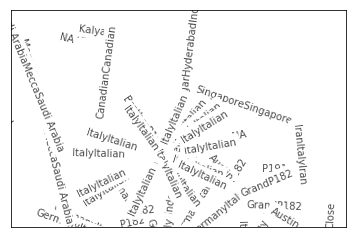

In [44]:
edgeLabels = {}  
for a, b in G.edges():
    edgeLabels[(a, b)] = str(G.get_edge_data(a, b, {"travelledFrom":0})["travelledFrom"])

nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edgeLabels, font_color='black', alpha=.7) 

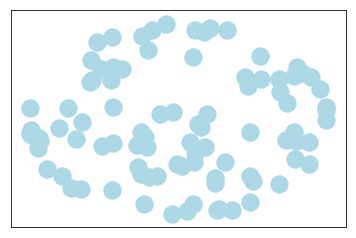

In [45]:
nx.draw_networkx_nodes(G, nodelist=PatientIDs, pos=layout, node_color='lightblue', label='P-Patient')

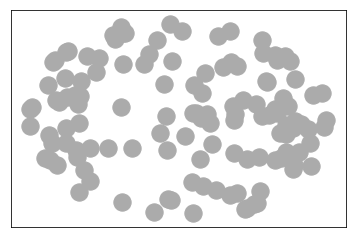

In [46]:
nx.draw_networkx_nodes(G, nodelist=contacts, pos=layout, node_color='#ABABAB', label='CP-Contact with a Patient')

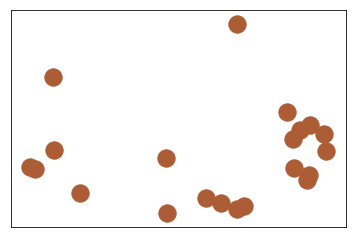

In [47]:
nx.draw_networkx_nodes(G, nodelist=high_degree_Patient0, pos=layout, node_color='#ac5d36', label='CP-Contact With More Than 1 Patient')

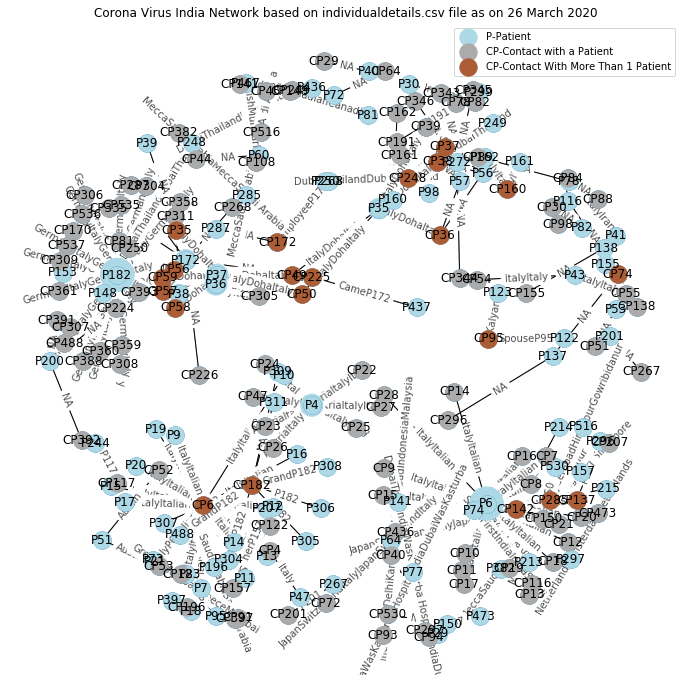

In [48]:
plt.figure(3,figsize=(12,12))
layout = nx.fruchterman_reingold_layout(G,
                                        k=.5,
                                        pos=None,
                                        fixed=None,
                                        iterations=100,
                                        #threshold=1e-4,
                                        weight='weight',
                                        scale=1,
                                        center=None,
                                        dim=2,
                                        seed=None)
nx.draw_networkx_edges(G, pos=layout, edge_color='#ABABAB')

PatientIDs = [node for node in G.nodes() if node in edgelist.PatientID.unique()]
size = [G.degree(node) * 70 for node in G.nodes() if node in edgelist.PatientID.unique()]
nx.draw_networkx_nodes(G, pos=layout, nodelist=PatientIDs, node_size=size, node_color='lightblue')

contacts = [node for node in G.nodes() if node in edgelist.Contacts0.unique()]
nx.draw_networkx_nodes(G, pos=layout, nodelist=contacts, node_size=10, node_color='#ABABAB')

high_degree_Patient0 = [node for node in G.nodes() if node in edgelist.Contacts0.unique() and G.degree(node) > 1]
nx.draw_networkx_nodes(G, pos=layout, nodelist=high_degree_Patient0, node_size=10, node_color='#ac5d36')


PatientIDs_dict = dict(zip(PatientIDs, PatientIDs))
nx.draw_networkx_labels(G, pos=layout, labels=PatientIDs_dict)
contactsIDs_dict = dict(zip(contacts, contacts))
nx.draw_networkx_labels(G, pos=layout, labels=contactsIDs_dict)

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos=layout, edges=edges, width=weights)

edgeLabels = {}  
for a, b in G.edges():
    edgeLabels[(a, b)] = str(G.get_edge_data(a, b, {"travelledFrom":0})["travelledFrom"])

nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edgeLabels, font_color='black', alpha=.7) 

nx.draw_networkx_nodes(G, nodelist=PatientIDs, pos=layout, node_color='lightblue', label='P-Patient')
nx.draw_networkx_nodes(G, nodelist=contacts, pos=layout, node_color='#ABABAB', label='CP-Contact with a Patient')
nx.draw_networkx_nodes(G, nodelist=high_degree_Patient0, pos=layout, node_color='#ac5d36', label='CP-Contact With More Than 1 Patient')
plt.legend(numpoints = 1)


plt.axis('off')
plt.title("Corona Virus India Network based on individualdetails.csv file as on 26 March 2020")
plt.show()

In [50]:
# https://www.kaggle.com/debbdeb/covid19-india-network-and-map-visualization/notebook

In [51]:
import igraph.test
from igraph import *
import operator
import copy
from IPython.core.display import display, SVG
import math

In [52]:
edgelist

,PatientID,Contacts0,travelledFrom,weight
0,P10,CP6,ItalyItalian,1
1,P11,CP6,ItalyItalian,1
2,P116,CP74,NA,1
3,P12,CP6,ItalyItalian,1
4,P122,CP95,SpouseP95,1
5,P123,CP95,Kalyan,1
6,P13,CP6,ItalyItalian,1
7,P137,CP296,NA,1
8,P137,CP74,NA,1
9,P138,CP155,NA,1


In [55]:
edgelist.PatientID

0       P10
1       P11
2      P116
3       P12
4      P122
5      P123
6       P13
7      P137
8      P137
9      P138
10      P14
11     P141
12     P148
13      P15
14     P150
15     P153
16     P155
17     P157
18      P16
19     P160
20     P160
21     P161
22     P162
23      P17
24     P172
25     P172
26     P172
27     P172
28     P172
29     P172
30      P18
31     P182
32     P182
33     P182
34     P182
35     P182
36     P182
37     P182
38     P182
39     P182
40     P182
41     P182
42     P182
43     P182
44     P182
45     P182
46     P182
47      P19
48     P196
49      P20
50     P200
51     P200
52     P200
53     P201
54     P207
55      P21
56     P213
57     P214
58     P215
59     P244
60     P248
61     P248
62     P249
63     P250
64     P267
65     P268
66     P272
67     P272
68     P272
69     P272
70     P285
71     P285
72     P287
73      P29
74     P296
75     P297
76     P299
77      P30
78     P304
79     P305
80     P306
81     P307
82     P308
83  

In [64]:
lines=[]
for i in range(0,len(edgelist)):
#     print(edgelist.PatientID[i])
    lines.append((edgelist.PatientID[i],edgelist.Contacts0[i]))
lines

[('P10', 'CP6'),
 ('P11', 'CP6'),
 ('P116', 'CP74'),
 ('P12', 'CP6'),
 ('P122', 'CP95'),
 ('P123', 'CP95'),
 ('P13', 'CP6'),
 ('P137', 'CP296'),
 ('P137', 'CP74'),
 ('P138', 'CP155'),
 ('P14', 'CP6'),
 ('P141', 'CP436'),
 ('P148', 'CP81'),
 ('P15', 'CP6'),
 ('P150', 'CP530'),
 ('P153', 'CP170'),
 ('P155', 'CP138'),
 ('P157', 'CP207'),
 ('P16', 'CP6'),
 ('P160', 'CP162'),
 ('P160', 'CP161'),
 ('P161', 'CP160'),
 ('P162', 'CP160'),
 ('P17', 'CP6'),
 ('P172', 'CP225'),
 ('P172', 'CP226'),
 ('P172', 'CP268'),
 ('P172', 'CP287'),
 ('P172', 'CP335'),
 ('P172', 'CP224'),
 ('P18', 'CP6'),
 ('P182', 'CP305'),
 ('P182', 'CP306'),
 ('P182', 'CP307'),
 ('P182', 'CP308'),
 ('P182', 'CP309'),
 ('P182', 'CP311'),
 ('P182', 'CP358'),
 ('P182', 'CP359'),
 ('P182', 'CP360'),
 ('P182', 'CP361'),
 ('P182', 'CP388'),
 ('P182', 'CP488'),
 ('P182', 'CP535'),
 ('P182', 'CP536'),
 ('P182', 'CP537'),
 ('P182', 'CP304'),
 ('P19', 'CP6'),
 ('P196', 'CP397'),
 ('P20', 'CP6'),
 ('P200', 'CP392'),
 ('P200', 'CP393')

In [65]:
names=[]
for i in range(0,len(edgelist)):
    names.append(edgelist.travelledFrom[i])
names

['ItalyItalian',
 'ItalyItalian',
 'NA',
 'ItalyItalian',
 'SpouseP95',
 'Kalyan',
 'ItalyItalian',
 'NA',
 'NA',
 'NA',
 'ItalyItalian',
 'IndonesianDelhiKarimnagarHyderabadIndonesiaMalaysia',
 'NA',
 'ItalyItalian',
 'NA',
 'NA',
 'Close',
 'SingaporeSingapore',
 'ItalyItalian',
 'ItalyItaly',
 'ItalyItaly',
 'ItalyItaly',
 'ItalyItaly',
 'ItalyItalian',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'ItalyItalian',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'GermanyItalyGermanyItaly',
 'ItalyItalian',
 'Saudi ArabiaSaudi Arabia',
 'ItalyItalian',
 'NA',
 'NA',
 'NA',
 'NA',
 'BrotherP157',
 'ItalyP6It

In [73]:
Gm = igraph.Graph.TupleList(lines, directed = False,edge_attrs = ['weight'])
Gm.vs['label'] = names # vertices are named with the terrorist names


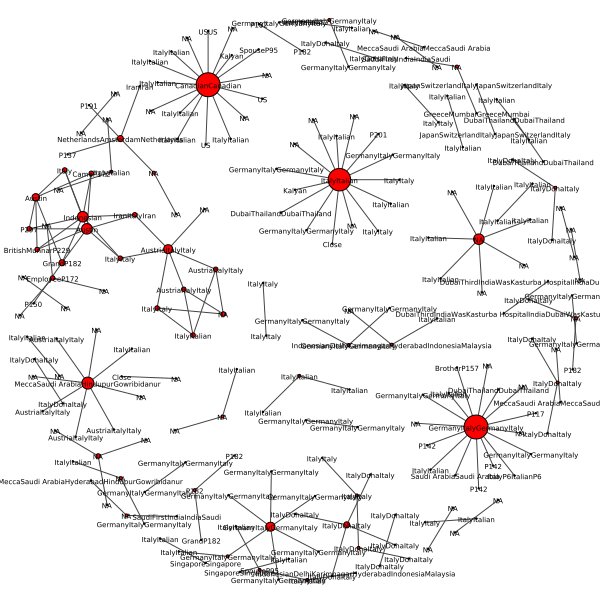

In [74]:
Gm.deg = [1.5*i for i in Gm.degree()] 
layout = Gm.layout("kk")
out = plot(Gm,layout=layout,vertex_size=Gm.deg,vertex_label_size = 7)
out

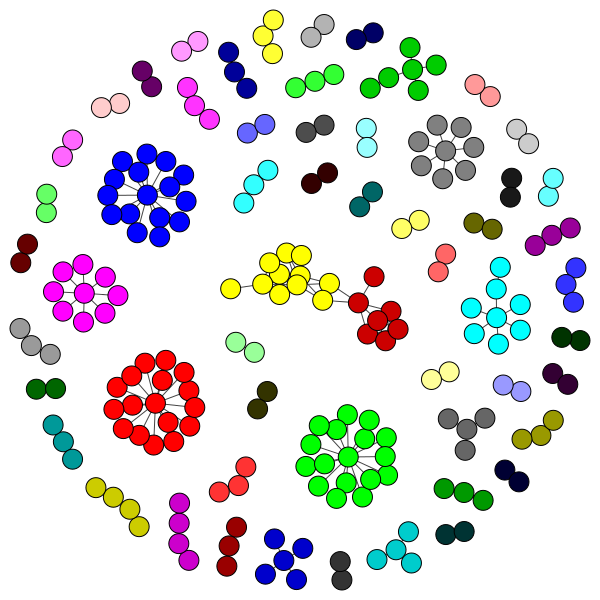

In [75]:
Gm = igraph.Graph.TupleList(lines, directed = False, edge_attrs = ['weight'])
Gm.vs['labels'] = Gm.vs['name']
i = Gm.community_infomap()
pal = igraph.drawing.colors.ClusterColoringPalette(len(i))
Gm.vs['color'] = pal.get_many(i.membership)
out = plot(Gm)
# out.save('Outputs/Community_Dolphins.png')
out

In [77]:
t = Gm.largest_cliques()
print(t)

[(218, 217), (216, 214), (215, 214), (213, 1), (212, 211), (210, 209), (208, 1), (207, 204), (206, 204), (205, 204), (203, 201), (202, 201), (200, 199), (199, 102), (198, 197), (196, 195), (194, 1), (193, 192), (192, 75), (191, 189), (190, 189), (188, 172), (187, 172), (186, 172), (185, 172), (184, 172), (183, 172), (182, 172), (181, 172), (180, 172), (179, 172), (178, 172), (177, 172), (176, 172), (175, 172), (174, 172), (173, 172), (171, 123), (171, 119), (171, 118), (170, 123), (170, 119), (170, 118), (169, 168), (167, 166), (165, 133), (164, 162), (163, 162), (161, 110), (160, 159), (158, 157), (156, 155), (154, 37), (153, 152), (151, 149), (150, 149), (148, 147), (146, 145), (144, 137), (143, 137), (142, 137), (141, 137), (140, 137), (139, 137), (138, 137), (136, 135), (134, 129), (133, 132), (131, 129), (131, 128), (131, 127), (131, 126), (131, 125), (130, 129), (130, 128), (130, 127), (130, 126), (130, 125), (130, 122), (130, 121), (129, 124), (128, 124), (127, 124), (126, 124),

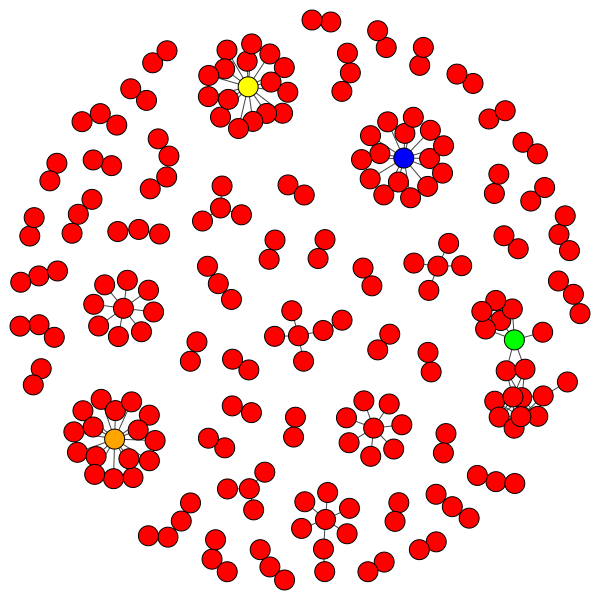

In [91]:
col = []
for i in range(0,219):
    if i==117:
        col.append('green')
    elif i==1:
        col.append('blue')
    elif i==172:
        col.append('yellow')
    elif i==44:
        col.append('orange')
    else:
        col.append('red')
Gm.vs['color'] = col
out = plot(Gm)
out

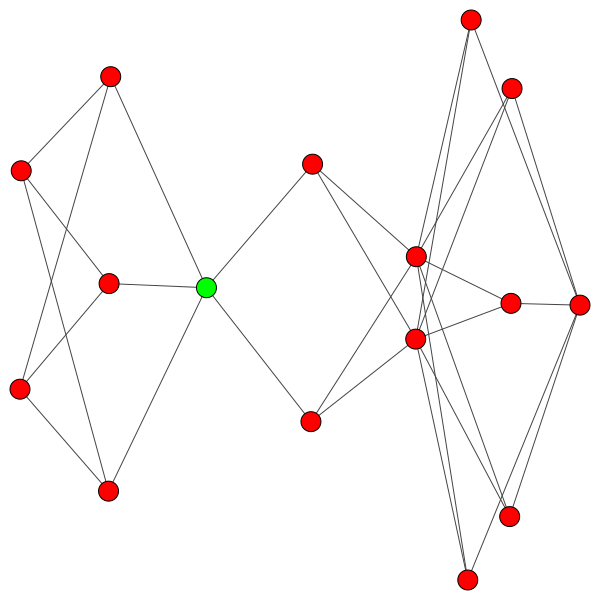

In [92]:
l = Gm.k_core()
out = plot(l[2])
# out.save('Outputs/2c-d.png')
out

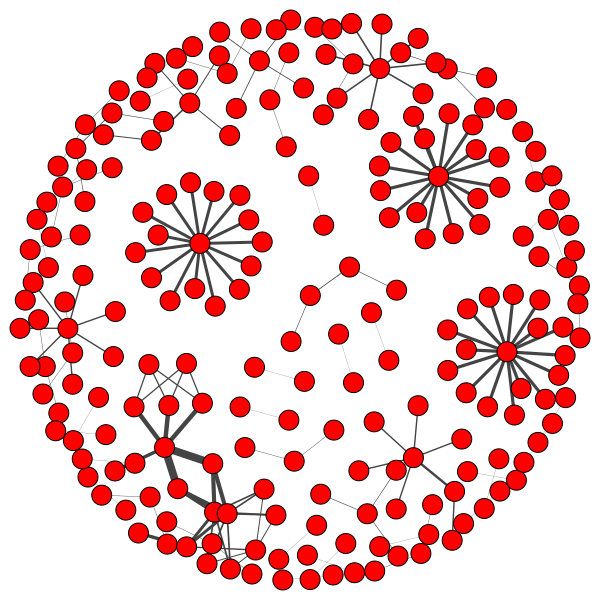

In [96]:
g = Graph.TupleList(lines, directed = False)
g.bet = [ i/5 for i in g.edge_betweenness()]
plot(g, layout = g.layout("kk"), edge_width = g.bet)
# betweeness

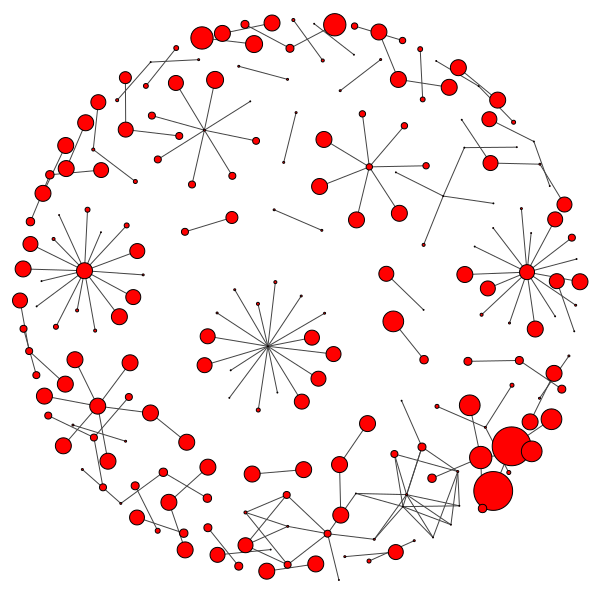

In [105]:
layout = g.layout("kk")
g.bet = [ i for i in g.edge_betweenness()]
out = plot(g,layout=layout,vertex_size=g.bet,vertex_label_size = 10)
out

In [106]:
print(names[g.bet.index(max(g.bet))])

ItalyDohaItaly
